In [1]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/45/6d/8c1d2570a52db6263d855c3ee3daf8f4bdf4a365cd6610772d6fce5fd904/xgboost-2.0.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.3 MB/s eta 0:00:00:00:010:01


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Load data
df = pd.read_csv('AAPL.csv', parse_dates = ['Date'], index_col = ['Date'])

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349136,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200


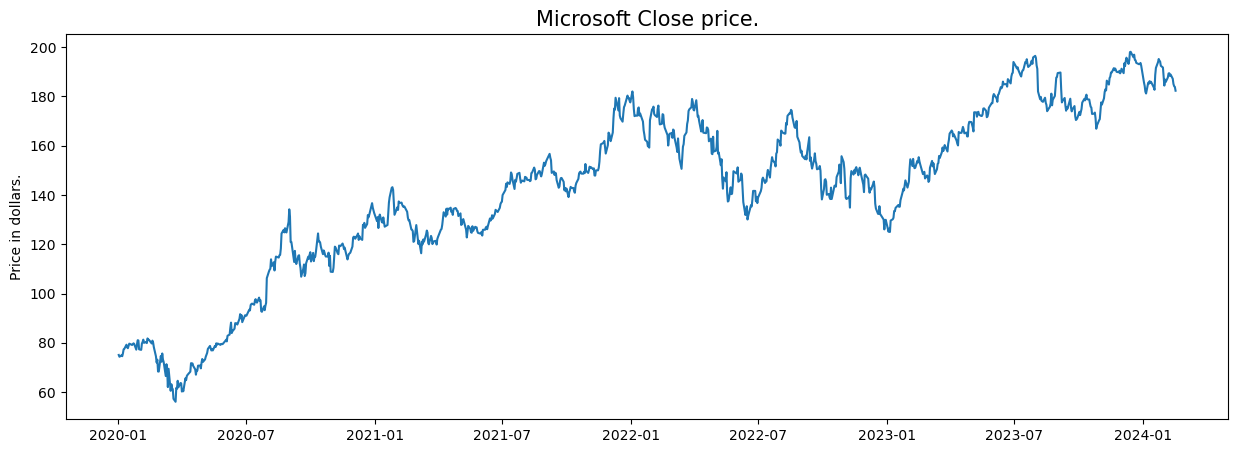

In [5]:
#perform EDA
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Microsoft Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [6]:
#Reload the data
df = pd.read_CSV('AAPL.csv')

AttributeError: module 'pandas' has no attribute 'read_CSV'

In [7]:
#Reload the data
df = pd.read_csv('AAPL.csv')

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349136,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200


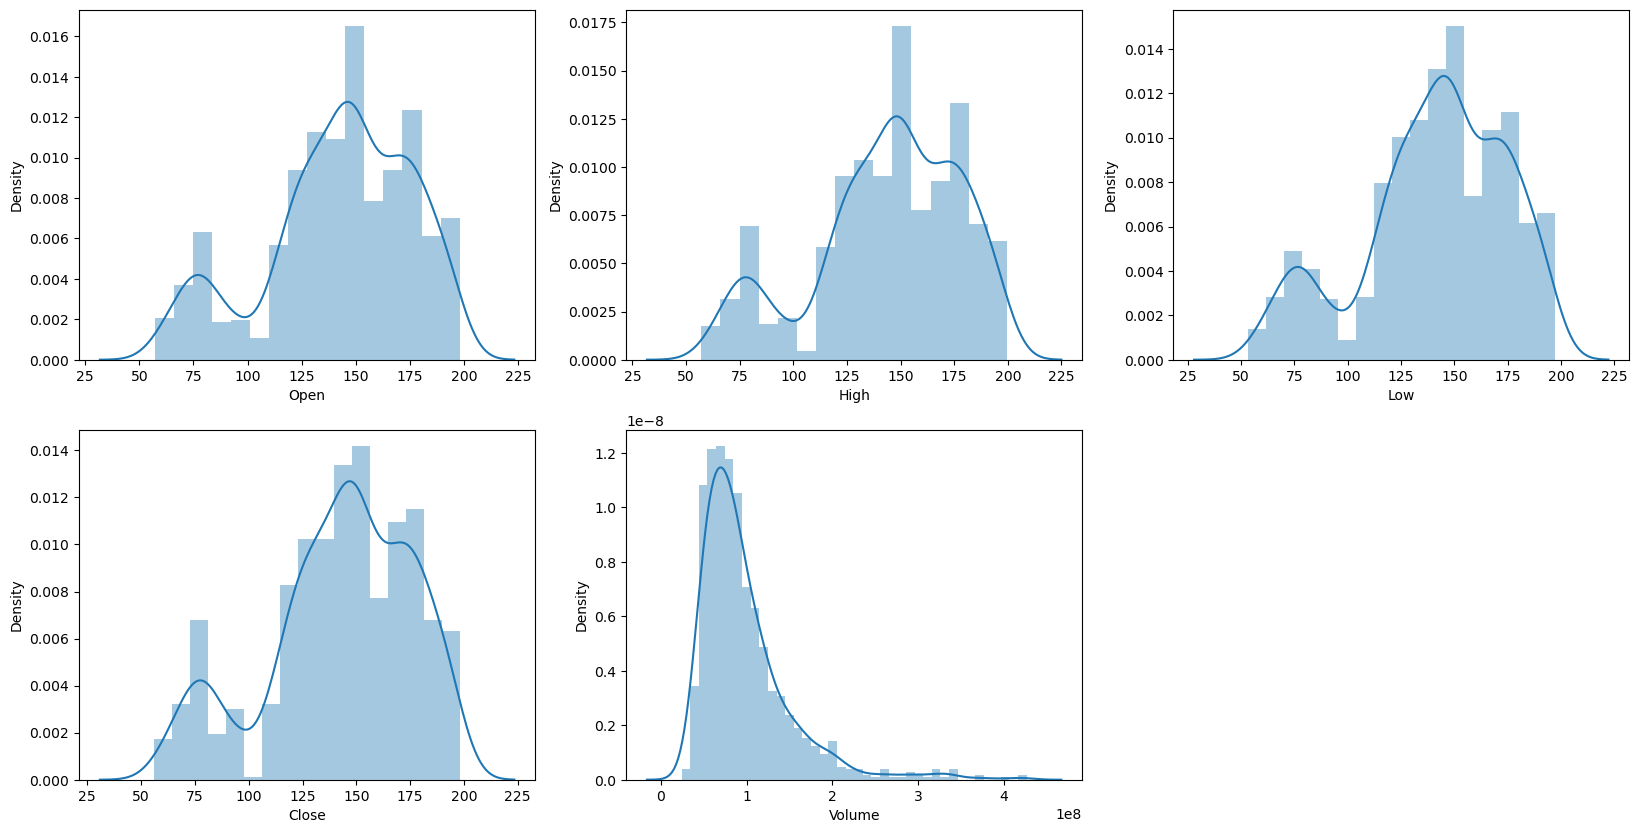

In [9]:
#plot data
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
    plt.show

In [10]:
#Split date into day/month/year
splitted = df['Date'].str.split('/', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

KeyError: 1

In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349136,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200


In [12]:
#Split date into day/month/year
splitted = df['Date'].str.split('/', expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

KeyError: 1

In [13]:
# Split date into day/month/year
splitted = df['Date'].str.split('/', expand=True)

# Check if the split operation resulted in at least 3 columns
    df['day'] = splitted[1].astype('int')
    df['month'] = splitted[0].astype('int')
    df['year'] = splitted[2].astype('int')

In [14]:
df.head

<bound method NDFrame.head of             Date        Open        High         Low       Close   Adj Close  \
0     2020-01-02   74.059998   75.150002   73.797501   75.087502   73.059418   
1     2020-01-03   74.287498   75.144997   74.125000   74.357498   72.349136   
2     2020-01-06   73.447502   74.989998   73.187500   74.949997   72.925636   
3     2020-01-07   74.959999   75.224998   74.370003   74.597504   72.582649   
4     2020-01-08   74.290001   76.110001   74.290001   75.797501   73.750237   
...          ...         ...         ...         ...         ...         ...   
1034  2024-02-12  188.419998  188.669998  186.789993  187.149994  187.149994   
1035  2024-02-13  185.770004  186.210007  183.509995  185.039993  185.039993   
1036  2024-02-14  185.320007  185.529999  182.440002  184.149994  184.149994   
1037  2024-02-15  183.550003  184.490005  181.350006  183.860001  183.860001   
1038  2024-02-16  183.419998  184.850006  181.669998  182.309998  182.309998   

         

In [15]:
# Split date into day/month/year
splitted = df['Date'].str.split('/', expand=True)

# Check if the split operation resulted in at least 3 columns
    df['day'] = splitted[1].astype('int')
    df['month'] = splitted[0].astype('int')
    df['year'] = splitted[2].astype('int')

IndentationError: unexpected indent (2315331603.py, line 5)

In [16]:
# Split date into day/month/year
splitted = df['Date'].str.split('/', expand=True)

# Check if the split operation resulted in at least 3 columns
df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

KeyError: 1

In [17]:
# Split date into day/month/year
splitted = df['Date'].str.split('/', expand=True)

# Ensure the split operation resulted in at least 3 columns
if len(splitted.columns) >= 3:
    df['day'] = splitted[1].astype('int')
    df['month'] = splitted[0].astype('int')
    df['year'] = splitted[2].astype('int')
else:
    # Handle the case where some rows don't have the expected format
    print("Some dates may not be in the expected format, resulting in fewer columns.")


Some dates may not be in the expected format, resulting in fewer columns.


In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349136,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200


In [19]:
# Assuming 'df' is your DataFrame and it contains columns named 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'

# Split the 'Date' column into 'day', 'month', and 'year'
splitted = df['Date'].str.split('/', expand=True)

# Ensure the split operation resulted in at least 3 columns
if splitted.shape[1] >= 3:
    # Assign the split values to new columns in 'df'
    df['day'] = splitted[1].astype('int')   # Day is the second element
    df['month'] = splitted[0].astype('int') # Month is the first element
    df['year'] = splitted[2].astype('int')  # Year is the third element
else:
    print("Error: Some dates may not be in the expected format or have missing components.")

# Define the columns to display
columns_to_display = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'day', 'month', 'year']

# Display the first few rows of 'df' with the specified columns
df_head_with_specified_columns = df[columns_to_display].head()
df_head_with_specified_columns


Error: Some dates may not be in the expected format or have missing components.


KeyError: "['day', 'month', 'year'] not in index"

In [20]:
# Assuming 'df' is your DataFrame and it contains columns named 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'

# Split the 'Date' column into 'day', 'month', and 'year'
splitted = df['Date'].str.split('/', expand=True)

# Check that the split operation resulted in at least 3 columns
if splitted.shape[1] >= 3:
    df['day'] = splitted[1].astype('int')   # Day is the second element
    df['month'] = splitted[0].astype('int') # Month is the first element
    df['year'] = splitted[2].astype('int')  # Year is the third element
else:
    print("Error: Some dates may not be in the expected format or have missing components.")

# Now, check if the new columns were successfully added before proceeding
if {'day', 'month', 'year'}.issubset(df.columns):
    # Define the columns to display
    columns_to_display = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'day', 'month', 'year']

    # Display the first few rows of 'df' with the specified columns
    df_head_with_specified_columns = df[columns_to_display].head()
    df_head_with_specified_columns
else:
    print("The new columns were not added to the DataFrame. Please check the 'Date' column format and the split operation.")


Error: Some dates may not be in the expected format or have missing components.
The new columns were not added to the DataFrame. Please check the 'Date' column format and the split operation.


In [21]:
df.head

<bound method NDFrame.head of             Date        Open        High         Low       Close   Adj Close  \
0     2020-01-02   74.059998   75.150002   73.797501   75.087502   73.059418   
1     2020-01-03   74.287498   75.144997   74.125000   74.357498   72.349136   
2     2020-01-06   73.447502   74.989998   73.187500   74.949997   72.925636   
3     2020-01-07   74.959999   75.224998   74.370003   74.597504   72.582649   
4     2020-01-08   74.290001   76.110001   74.290001   75.797501   73.750237   
...          ...         ...         ...         ...         ...         ...   
1034  2024-02-12  188.419998  188.669998  186.789993  187.149994  187.149994   
1035  2024-02-13  185.770004  186.210007  183.509995  185.039993  185.039993   
1036  2024-02-14  185.320007  185.529999  182.440002  184.149994  184.149994   
1037  2024-02-15  183.550003  184.490005  181.350006  183.860001  183.860001   
1038  2024-02-16  183.419998  184.850006  181.669998  182.309998  182.309998   

         

In [22]:
print(df['Date'].head())


0    2020-01-02
1    2020-01-03
2    2020-01-06
3    2020-01-07
4    2020-01-08
Name: Date, dtype: object


In [23]:
# Split date into year, month, day
splitted = df['Date'].str.split('-', expand=True)

# Assuming the format is 'YYYY-MM-DD'
df['year'] = splitted[0].astype('int')   # Year is the first element
df['month'] = splitted[1].astype('int')  # Month is the second element
df['day'] = splitted[2].astype('int')    # Day is the third element

# Display the first few rows to verify
df_head_with_date_parts = df.head()
df_head_with_date_parts


,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400,2020,1,2
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349136,146322800,2020,1,3
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200,2020,1,6
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000,2020,1,7
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200,2020,1,8


In [24]:
#create quarter to determine effects on stock price
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)

In [25]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,is_quarter_end
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400,2020,1,2,0
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349136,146322800,2020,1,3,0
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200,2020,1,6,0
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000,2020,1,7,0
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200,2020,1,8,0


In [26]:
#data split and normalization
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [27]:
#create quarter based on date split
features = df[['open-close','low-high', 'is_quarter_end']]
target = df['target']

In [28]:
#scale or normalize data
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [29]:
#split dataset
X train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

SyntaxError: invalid syntax (995106151.py, line 2)

In [30]:
#split dataset
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(935, 3) (104, 3)


In [31]:
#model development and evaluation
#train the model with logistic regression, support vector machine, xgbclassifier

models = [LogisticRegression(), SVC(
    kernels='poly', probability=True), XGBClassifier()]

for i in range(3)
    models[i].fit(X_train, Y_train)
    
    print(f'{models[i]} : ')
    print ('Training Accuracy : ', metrics.roc_auc_score(
        Y_train, models[i].predict_proba(X_train)[:1]))
    print('Testing Accuracy : ', metrics.roc_auc_score(
        Y_valid,, models[i].predict_proba(X_valid)[:,1]))
    print()

SyntaxError: unterminated string literal (detected at line 12) (337483654.py, line 12)

In [32]:
#model development and evaluation
#train the model with logistic regression, support vector machine, xgbclassifier

models = [LogisticRegression(), SVC(
    kernels='poly', probability=True), XGBClassifier()]

for i in range(3)
    models[i].fit(X_train, Y_train)
    
    print(f'{models[i]} : ')
    print ('Training Accuracy : ', metrics.roc_auc_score(
        Y_train, models[i].predict_proba(X_train)[:1]))
    print('Testing Accuracy : ', metrics.roc_auc_score(
        Y_valid,, models[i].predict_proba(X_valid)[:,1]))
    print()

SyntaxError: expected ':' (627339392.py, line 7)

In [33]:
#model development and evaluation
#train the model with logistic regression, support vector machine, xgbclassifier

models = [LogisticRegression(), SVC(
    kernels='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)
    
    print(f'{models[i]} : ')
    print ('Training Accuracy : ', metrics.roc_auc_score(
        Y_train, models[i].predict_proba(X_train)[:1]))
    print('Testing Accuracy : ', metrics.roc_auc_score(
        Y_valid,, models[i].predict_proba(X_valid)[:,1]))
    print()

SyntaxError: invalid syntax (1333890755.py, line 14)

In [34]:
#model development and evaluation
#train the model with logistic regression, support vector machine, xgbclassifier

models = [LogisticRegression(), SVC(
    kernels='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)
    
    print(f'{models[i]} : ')
    print ('Training Accuracy : ', metrics.roc_auc_score(
        Y_train, models[i].predict_proba(X_train)[:1]))
    print('Testing Accuracy : ', metrics.roc_auc_score(
        Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()

TypeError: SVC.__init__() got an unexpected keyword argument 'kernels'

In [35]:
#model development and evaluation
#train the model with logistic regression, support vector machine, xgbclassifier

models = [LogisticRegression(), SVC(
    kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)
    
    print(f'{models[i]} : ')
    print ('Training Accuracy : ', metrics.roc_auc_score(
        Y_train, models[i].predict_proba(X_train)[:1]))
    print('Testing Accuracy : ', metrics.roc_auc_score(
        Y_valid,, models[i].predict_proba(X_valid)[:,1]))
    print()

SyntaxError: invalid syntax (4098614113.py, line 14)

In [36]:
#model development and evaluation
#train the model with logistic regression, support vector machine, xgbclassifier

models = [LogisticRegression(), SVC(
    kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)
    
    print(f'{models[i]} : ')
    print ('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:, 1]))

    print('Testing Accuracy : ', metrics.roc_auc_score(
        Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()

LogisticRegression() : 


ValueError: Found input variables with inconsistent numbers of samples: [935, 1]

In [37]:
#model development and evaluation
#train the model with logistic regression, support vector machine, xgbclassifier

models = [LogisticRegression(), SVC(
    kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)
    
    print(f'{models[i]} : ')
    print ('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:, 1]))

    print('Testing Accuracy : ', metrics.roc_auc_score(
        Y_valid, models[i].predict_proba(X_valid)[:,1]))
    print()

LogisticRegression() : 
Training Accuracy :  0.5211179839633449
Testing Accuracy :  0.4662962962962963

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.458680412371134
Testing Accuracy :  0.4907407407407407

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accurac